***
***

# Supervised Machine Learning Model 


<h3>Jose Daniel Buelto Perez</h3><br>

<strong>Course:</strong> Machine Learning

<strong>Professor:</strong> Chase Kusterer

***
***

<h2>Supervised ML Models</h2>
    
Supervised machine learning models rely on labled input data to learn a function that will predict an output when given new, unseen data. 

***

<br><h2>Company Background</h2>

Apprentice Chef, Inc. is a hypothetical company innovating the way in which busy professionals cook at home. They offer a vast selection of daily-prepared gourmet meals delivered directly to their customers' door. Each meal takes about 30 minutes to finish cooking at home and comes with award-winning disposable cookware for fast cleanup. Meal orders can be easily placed via their online platform and mobile app. In an attempt to diversity their revenue stream, the company launched the "Halfway There" cross-selling promotion where subscribers receive a half bottle of wine every Wednesday. 

***

<h2>Project Scope</h2>

The purpose of this project is to analyze the data of current customers, discover key aspects of consumer purchasing behavior, develop insights, and <strong>buid a supervised machine learning model to predict which customers will subscribe to the "Halfway There" promotional campaign.</strong>

<strong>The audience size includes data from 1,946 customers.</strong> <br><br><br>

***

<br><h2>Key Company Information</h2>

- Customer registration is done on the webiste or mobile app and requires a phone number to be provided. 

- Specifying tastes and preferences on the customer onboarding journey is important for meal customization. 

- Cancellation Policy: only orders cancelled before noon on the day of delivery are subject to a full refund.
    - Cancellations done after noon but before 3:00 pm, will receive partial refund. 
    
- Each meal consists of a variety selection of protein, vegetables, carbs, and spices> Cookware is also included in all meals to finalize preparation at home. Optional bevergaes are also available to be selected for each meal. 
    
- Ad hoc prices are used for each meal set and can range from $10 to $23 for the meals. Additional costs can be incurred by adding beverages to the meal sets. 

- Weekly Meal Plans are available for product discounts. 

***

<br><h2>Notes on the Dataset</h2>

The dataset used in this project is represented by customers' purchase data, website activity, registration details, order cancellations, <strong>"Halfway There" cross-sell success</strong>, as well as the folliwing demographic information: <br>

<h4>Name:</h4>

- Customer full name collected upon registration


<h4>Email:</h4>

- Customer email collected upon registration 


<h4>First Name:</h4>

- Customer first name collected upon registration 

<h4>Family Name:</h4>

- Customer last name collected upon registration 


***

# Data Importing and Library Loading

***
***

In [1]:
#importing required packages
import pandas                  as pd 
import numpy                   as np
import random                  as rand                       # random number generation
import matplotlib.pyplot       as plt
import seaborn                 as sns                        # essential graphical output
import statsmodels.formula.api as smf
import statsmodels.api         as sm
from sklearn.neighbors         import KNeighborsClassifier   #k-NN for classification
from sklearn.model_selection   import train_test_split

#hyperparameter tuning packages
from sklearn.model_selection   import GridSearchCV
from sklearn.tree              import export_graphviz        # exports graphics
from sklearn.externals.six     import StringIO               # saves objects in memory
from IPython.display           import Image                  # displays on frontend
import pydotplus                                             # interprets dot objects
from sklearn.model_selection   import GridSearchCV           # hyperparameter tuning
from sklearn.metrics           import make_scorer            # customizable scorer
from scipy.stats               import randint
from sklearn.model_selection   import RandomizedSearchCV

import sklearn.linear_model                                  # linear models
from sklearn.linear_model      import LinearRegression       # linear regression (scikit-learn)
from sklearn.linear_model      import LogisticRegression
from sklearn.linear_model      import Lasso
from sklearn.neighbors         import KNeighborsRegressor    # k-NN for Regression
from sklearn.preprocessing     import StandardScaler         # standard scaler
import sklearn.metrics
from sklearn.metrics           import roc_curve              #ROC curve
from sklearn.metrics           import roc_auc_score          # auc score
from sklearn.metrics           import classification_report  #confusion matrix classifier
from sklearn.metrics           import confusion_matrix       #confusion matrix
from sklearn                   import datasets
import gender_guesser.detector as gender                     # guess gender based on (given) name

#libraries for classification trees
from sklearn.tree              import DecisionTreeClassifier # classification trees
from sklearn.tree              import export_graphviz        # exports graphics
from sklearn.externals.six     import StringIO               # saves objects in memory
from IPython.display           import Image                  # displays on frontend
import pydotplus                                             # interprets dot objects

#libraries for interactive widgets
from ipywidgets                import interactive
import ipywidgets              as     widgets
from IPython.display           import display, HTML

/Users/josebuelto/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>Reading Dataset File and Setting Display Options</h2>

***

In [2]:
# setting pandas print options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


#reading original file as original_df for recovering the predict classifier column CROSS_SELL_SUCCESS
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

<br><h3>Dataset Description</h3>

The following DataFrame offers a description of each varibale included in the dataset.
***

In [3]:
# loading data dictionary for apprentice chef dataset 
chef_df_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

# displaying the data dictionary
chef_df_description

Column Data Type                                                                                          Description
0                        REVENUE     float                                  Total revenue generated over the first year of a customer's journey
1             CROSS_SELL_SUCCESS   integer                                           Success of promoting Halfway There (1 = SUCCESS, 0 = FAIL)
2                           NAME    string                                          Full name of customer (collected upon initial registration)
3                          EMAIL    string                                              Email of customer (collected upon initial registration)
4                     FIRST_NAME    string                                         First name of customer (collected upon initial registration)
5                    FAMILY_NAME    string                                          Last name of customer (collected upon initial registration)
6            TOTAL_MEALS_ORDERED   integer                                                    Total count of meals ordered per customer account
7             UNIQUE_MEALS_PURCH   integer                                               Count of unique meal sets ordered per customer account
8    CONTACTS_W_CUSTOMER_SERVICE   integer              Count of times a customer made contact with customer service (phone, chatbot, or email)
9      PRODUCT_CATEGORIES_VIEWED   integer                        Total number of meal categories viewed (online and mobile platforms combined)
10       AVG_TIME_PER_SITE_VISIT     float                                     Average platform (web or mobile) visit time per customer account
11                 MOBILE_NUMBER   integer                      Customer registered with a mobile or landline number (1 = MOBILE, 0 = LANDLINE)
12     CANCELLATIONS_BEFORE_NOON   integer                                      Number of meals canceled before 12 PM as per cancelation policy
13      CANCELLATIONS_AFTER_NOON   integer                                        Number of meals canceled after 3 PM as per cancelation policy
14        TASTES_AND_PREFERENCES   integer                                     Customer specified their tastes and preferences in their profile
15                 MOBILE_LOGINS   integer                                                         Count of logins on the mobile platform (app)
16                     PC_LOGINS   integer                                                        Count of logins on the web platform (website)
17                   WEEKLY_PLAN   integer                                              Count of weeks a customer subscribed to the weekly plan
18              EARLY_DELIVERIES   integer                                   Count of orders that we delivered BEFORE the alloted delivery time
19               LATE_DELIVERIES   integer                                    Count of orders that we delivered AFTER the alloted delivery time
20                PACKAGE_LOCKER   integer                                     Customer's building has a package locker service or package room
21           REFRIGERATED_LOCKER   integer                                                               Package room has a refrigerated locker
22  FOLLOWED_RECOMMENDATIONS_PCT     float  Percentage of time a customer followed meal recommendations generated displayed on the web or mo...
23             AVG_PREP_VID_TIME     float                Average time in seconds a customer watched  instructional videos for meal preparation
24            LARGEST_ORDER_SIZE   integer                                     Largest number of meals a customer has ordered in a single order
25       MASTER_CLASSES_ATTENDED   integer                                   Count of times a customer attended master class (learning to cook)
26            MEDIAN_MEAL_RATING   integer                                                          Median meal satisfaction rating by cus

<br><h2>User-Defined Functions</h2>
<br><h3>The following user-defined functions will be used for:</h3>
1. Flagging all columns that have missing values with 'm-COLUMN_NAME'.
2. Text split feature to split the customer name string values and count the number of names of each customer. 
3. Plotting the decision tree classifier for feature selection.
4. Plotting the feature importances from the decision tree classifier. 
5. Plotting and returning the optimal number of neighbors with K-Nearest NEighbors.
6. Visualizing the confusion matrix of the classifier model to assess its precision and recall performance.

***

In [4]:
# user defined functions 

#################################################################################################
# mv_flagger
#################################################################################################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#################################################################################################
# text_split_feature
#################################################################################################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        
        

#################################################################################################
# display_tree
#################################################################################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of predictor features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img


#################################################################################################
# plot_feature_importances
#################################################################################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
        
        
#################################################################################################
# optimal_neighbors
#################################################################################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1



#################################################################################################
# visual_cm
#################################################################################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<br><h3>Missing Value Flagging and Treatment</h3>

Based on the missing value flagger function, it can be observed that only the last name column (Family Name) contains missing values. These missing values were inputted with the customer's full name of their respective rows. 
<br>

***

In [5]:
# running the mv_flagger function on original_df
original_df = mv_flagger(df = original_df)

In [6]:
#filling missing values in FAMILY_NAME with NAME field of their respective rows
fill = original_df['NAME']
original_df['FAMILY_NAME'].fillna(fill, inplace = True)

#dropping missing value flag column now that the missing values of family name have been inputted 
original_df = original_df.drop('m_FAMILY_NAME', axis = 1)

In [7]:
#saving dataset with no missing values as a new excel file 
original_df.to_excel("Chef_df_noNA.xlsx",
              index = False)

# reading the file as a pandas data frame 
chef_noNA = pd.read_excel('Chef_df_noNA.xlsx')

***

# Dataset Exploration & Feature Engineering

***
***

<h2>Defining Outlier Thresholds for Feature Engineering</h2>

<br>In the following section, histograms were used on each variable to determine cut-off points for outliers based on their tails. The histograms are not displayed in order to maintain this report as concise as possible. However, they were done using the distplot function of Seaborn. 

<strong>The engineered featured based on the thresholds are shown below. These features will improve the precision of the model for predicting the most likely outcome by removing the outliers.</strong><br>

***

<h3>Feature Engineering based on Outlier Thresholds</h3>

***

In [8]:
#############################
#Defining outlier thresholds #
#############################
revenue_hi      = 6000
largest_order_lo = 2
largest_order_hi  = 8
total_meals_hi  = 250
unique_meals_hi  = 11
avg_time_site_visit_hi  = 280
product_categories_viewed_lo = 1
product_categories_viewed_hi = 10
avg_clicks_per_visit_lo = 7.3
avg_clicks_per_visit_hi = 20
total_photos_viewed_hi    = 500
cancellations_before_noon_hi    = 6 
cancellations_after_noon_hi     = 2 
taste_and_preferences_hi     = 1
weekly_plan_hi = 20
pc_logins_lo = 4.9
pc_logins_hi  = 6
mobile_logins_lo = 0.9
mobile_logins_hi    = 2.1
early_deliveries_hi = 4
late_deliveries_hi   = 10
followed_recommendations_pct_hi = 90
avg_prep_vid_time_hi   = 300
master_classes_attended_hi = 2
median_meal_rating_hi = 4
package_locker_hi = 1
refrigerated_locker_hi = 1
mobile_number_hi = 1
contacts_w_customer_service_lo = 3
contacts_w_customer_service_hi = 12.5
cross_sell_success_hi = 1


##############################################
# developing features (columns) for outliers #
##############################################

# REVENUE
chef_noNA['out_REVENUE'] = 0
condition_hi = chef_noNA.loc[0:,'out_REVENUE'][chef_noNA['REVENUE'] > revenue_hi]

chef_noNA['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# LARGEST_ORDER_SIZE
chef_noNA['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef_noNA.loc[0:,'out_LARGEST_ORDER_SIZE'][chef_noNA['LARGEST_ORDER_SIZE'] > largest_order_hi]
condition_lo = chef_noNA.loc[0:,'out_LARGEST_ORDER_SIZE'][chef_noNA['LARGEST_ORDER_SIZE'] < largest_order_lo]

chef_noNA['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_noNA['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_MEALS_ORDERED
chef_noNA['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chef_noNA.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef_noNA['TOTAL_MEALS_ORDERED'] > total_meals_hi]

chef_noNA['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# UNIQUE_MEALS_PURCH
chef_noNA['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = chef_noNA.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef_noNA['UNIQUE_MEALS_PURCH'] > unique_meals_hi]

chef_noNA['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
chef_noNA['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = chef_noNA.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef_noNA['AVG_TIME_PER_SITE_VISIT'] > avg_time_site_visit_hi]

chef_noNA['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PRODUCT_CATEGORIES_VIEWED
chef_noNA['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = chef_noNA.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][chef_noNA['PRODUCT_CATEGORIES_VIEWED'] > product_categories_viewed_hi]
condition_lo = chef_noNA.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][chef_noNA['PRODUCT_CATEGORIES_VIEWED'] < product_categories_viewed_lo]

chef_noNA['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_noNA['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
chef_noNA['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = chef_noNA.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef_noNA['AVG_CLICKS_PER_VISIT'] > avg_clicks_per_visit_hi]
condition_lo = chef_noNA.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chef_noNA['AVG_CLICKS_PER_VISIT'] < avg_clicks_per_visit_lo]


chef_noNA['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef_noNA['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
chef_noNA['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef_noNA.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef_noNA['TOTAL_PHOTOS_VIEWED'] > total_photos_viewed_hi]

chef_noNA['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# CANCELLATIONS_BEFORE_NOON
chef_noNA['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = chef_noNA.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef_noNA['CANCELLATIONS_BEFORE_NOON'] > cancellations_before_noon_hi]

chef_noNA['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# CANCELLATIONS_AFTER_NOON
chef_noNA['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef_noNA.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef_noNA['CANCELLATIONS_AFTER_NOON'] > cancellations_after_noon_hi]

chef_noNA['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# TASTES_AND_PREFERENCES
chef_noNA['out_TASTES_AND_PREFERENCES'] = 0
condition_hi = chef_noNA.loc[0:,'out_TASTES_AND_PREFERENCES'][chef_noNA['TASTES_AND_PREFERENCES'] > taste_and_preferences_hi]

chef_noNA['out_TASTES_AND_PREFERENCES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# WEEKLY_PLAN
chef_noNA['out_WEEKLY_PLAN'] = 0
condition_hi = chef_noNA.loc[0:,'out_WEEKLY_PLAN'][chef_noNA['WEEKLY_PLAN'] > weekly_plan_hi]

chef_noNA['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# PC_LOGINS
chef_noNA['out_PC_LOGINS'] = 0
condition_hi = chef_noNA.loc[0:,'out_PC_LOGINS'][chef_noNA['PC_LOGINS'] > pc_logins_hi]
condition_lo = chef_noNA.loc[0:,'out_PC_LOGINS'][chef_noNA['PC_LOGINS'] < pc_logins_lo]

chef_noNA['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

chef_noNA['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
chef_noNA['out_MOBILE_LOGINS'] = 0
condition_hi = chef_noNA.loc[0:,'out_MOBILE_LOGINS'][chef_noNA['MOBILE_LOGINS'] > mobile_logins_hi]
condition_lo = chef_noNA.loc[0:,'out_MOBILE_LOGINS'][chef_noNA['MOBILE_LOGINS'] < mobile_logins_lo]

chef_noNA['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

chef_noNA['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
chef_noNA['out_EARLY_DELIVERIES'] = 0
condition_hi = chef_noNA.loc[0:,'out_EARLY_DELIVERIES'][chef_noNA['EARLY_DELIVERIES'] > early_deliveries_hi]

chef_noNA['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# LATE_DELIVERIES
chef_noNA['out_LATE_DELIVERIES'] = 0
condition_hi = chef_noNA.loc[0:,'out_LATE_DELIVERIES'][chef_noNA['LATE_DELIVERIES'] > late_deliveries_hi]

chef_noNA['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# FOLLOWED_RECOMMENDATIONS_PCT
chef_noNA['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = chef_noNA.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][chef_noNA['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_recommendations_pct_hi]

chef_noNA['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# AVG_PREP_VID_TIME
chef_noNA['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chef_noNA.loc[0:,'out_AVG_PREP_VID_TIME'][chef_noNA['AVG_PREP_VID_TIME'] > avg_prep_vid_time_hi]

chef_noNA['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# MASTER_CLASSES_ATTENDED
chef_noNA['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = chef_noNA.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef_noNA['MASTER_CLASSES_ATTENDED'] > master_classes_attended_hi]

chef_noNA['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MEDIAN_MEAL_RATING
chef_noNA['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = chef_noNA.loc[0:,'out_MEDIAN_MEAL_RATING'][chef_noNA['MEDIAN_MEAL_RATING'] > median_meal_rating_hi]

chef_noNA['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# PACKAGE_LOCKER
chef_noNA['out_PACKAGE_LOCKER'] = 0
condition_hi = chef_noNA.loc[0:,'out_PACKAGE_LOCKER'][chef_noNA['PACKAGE_LOCKER'] > package_locker_hi]

chef_noNA['out_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)




# REFRIGERATED_LOCKER
chef_noNA['out_REFRIGERATED_LOCKER'] = 0
condition_hi = chef_noNA.loc[0:,'out_REFRIGERATED_LOCKER'][chef_noNA['REFRIGERATED_LOCKER'] > refrigerated_locker_hi]

chef_noNA['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# MOBILE_NUMBER
chef_noNA['out_MOBILE_NUMBER'] = 0
condition_hi = chef_noNA.loc[0:,'out_MOBILE_NUMBER'][chef_noNA['MOBILE_NUMBER'] > mobile_number_hi]

chef_noNA['out_MOBILE_NUMBER'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# CONTACTS_W_CUSTOMER_SERVICE
chef_noNA['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chef_noNA.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef_noNA['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_hi]
condition_lo = chef_noNA.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chef_noNA['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_w_customer_service_lo]

chef_noNA['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


chef_noNA['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# CROSS_SELL_SUCCESS
chef_noNA['out_CROSS_SELL_SUCCESS'] = 0
condition_hi = chef_noNA.loc[0:,'out_CROSS_SELL_SUCCESS'][chef_noNA['CROSS_SELL_SUCCESS'] > cross_sell_success_hi]

chef_noNA['out_CROSS_SELL_SUCCESS'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

<br><h2>Defining Trend Thresholds for Feature Engineering</h2>

<br>In the following section, scatterplots were used on each variable to determine cut-off points for outliers based on trend patterns. The scatterplots are not displayed in order to maintain this report as concise as possible. However, they were done using the scatterplot function of Seaborn. 

<strong>The engineered featured based on the thresholds are shown below. These features will improve the precision of the model for predicting the most likely outcome by removing the outliers.</strong><br>

***

<h3>Feature Engineering based on Trend Thresholds</h3>

***

In [9]:
##########################
# Trend-Based Thresholds #
##########################

largest_order_size_change_high = 9 #data scatters after this point
largest_order_size_change_low = 2 #data scatters before this point
followed_recom_pct_change_at = 40 #trend changes at this point with total meals ordered
avg_time_per_visit_change_high = 30 #data scatters above this point
avg_clicks_per_visit_change_low = 8 #data scatters below this point
total_photos_viewed_change_high = 950 #trend stops after this point 
cancellations_before_noon_change_high = 8 #data scatters after this point
cancellations_after_noon_change_high = 2.0 #data scatters after this point
late_deliveries_change_high = 15 #trend stops after this point
avg_prep_vid_time_change_high = 300 #data scatters after this point
avg_prep_vid_time_change_low = 50 #data scatters before this point
master_classess_attended_change_high = 2.0 #data scatters after this point
contacts_w_customer_service_change_high = 12 #data scatters after this point
contacts_w_customer_service_change_low = 2.0 #data stops before this point 


###################################################
# developing features (columns) for trend changes #
###################################################


# LARGEST_ORDER_SIZE_change_high
chef_noNA['change_high_LARGEST_ORDER_SIZE'] = 0
condition = chef_noNA.loc[0:,'change_high_LARGEST_ORDER_SIZE'][chef_noNA['LARGEST_ORDER_SIZE'] > largest_order_size_change_high]

chef_noNA['change_high_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# LARGEST_ORDER_SIZE_change_low
chef_noNA['change_low_LARGEST_ORDER_SIZE'] = 0
condition = chef_noNA.loc[0:,'change_low_LARGEST_ORDER_SIZE'][chef_noNA['LARGEST_ORDER_SIZE'] < largest_order_size_change_low]

chef_noNA['change_low_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# AVG_TIME_PER_SITE_VISIT_change_high 
chef_noNA['change_high_AVG_TIME_PER_SITE_VISIT'] = 0
condition = chef_noNA.loc[0:,'change_high_AVG_TIME_PER_SITE_VISIT'][chef_noNA['AVG_TIME_PER_SITE_VISIT'] > avg_time_per_visit_change_high]

chef_noNA['change_high_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# AVG_CLICKS_PER_VISIT_change_low
chef_noNA['change_low_AVG_CLICKS_PER_VISIT'] = 0
condition = chef_noNA.loc[0:,'change_low_AVG_CLICKS_PER_VISIT'][chef_noNA['AVG_CLICKS_PER_VISIT'] < avg_clicks_per_visit_change_low]

chef_noNA['change_low_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# TOTAL_PHOTOS_VIEWED_change_high
chef_noNA['change_high_TOTAL_PHOTOS_VIEWED'] = 0
condition = chef_noNA.loc[0:,'change_high_TOTAL_PHOTOS_VIEWED'][chef_noNA['TOTAL_PHOTOS_VIEWED'] > total_photos_viewed_change_high]

chef_noNA['change_high_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CANCELLATIONS_BEFORE_NOON_change_high
chef_noNA['change_high_CANCELLATIONS_BEFORE_NOON'] = 0
condition = chef_noNA.loc[0:,'change_high_CANCELLATIONS_BEFORE_NOON'][chef_noNA['CANCELLATIONS_BEFORE_NOON'] > cancellations_before_noon_change_high]

chef_noNA['change_high_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# CANCELLATIONS_AFTER_NOON_change_high
chef_noNA['change_high_CANCELLATIONS_AFTER_NOON'] = 0
condition = chef_noNA.loc[0:,'change_high_CANCELLATIONS_AFTER_NOON'][chef_noNA['CANCELLATIONS_AFTER_NOON'] > cancellations_after_noon_change_high]

chef_noNA['change_high_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# LATE_DELIVERIES_change_high
chef_noNA['change_high_LATE_DELIVERIES'] = 0
condition = chef_noNA.loc[0:,'change_high_LATE_DELIVERIES'][chef_noNA['LATE_DELIVERIES'] > late_deliveries_change_high]

chef_noNA['change_high_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# AVG_PREP_VID_TIME_change_high
chef_noNA['change_high_AVG_PREP_VID_TIME'] = 0
condition = chef_noNA.loc[0:,'change_high_AVG_PREP_VID_TIME'][chef_noNA['AVG_PREP_VID_TIME'] > avg_prep_vid_time_change_high]

chef_noNA['change_high_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# AVG_PREP_VID_TIME_change_low
chef_noNA['change_low_AVG_PREP_VID_TIME'] = 0
condition = chef_noNA.loc[0:,'change_low_AVG_PREP_VID_TIME'][chef_noNA['AVG_PREP_VID_TIME'] < avg_prep_vid_time_change_low]

chef_noNA['change_low_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# MASTER_CLASSES_ATTENDED_change_high
chef_noNA['change_high_MASTER_CLASSES_ATTENDED'] = 0
condition = chef_noNA.loc[0:,'change_high_MASTER_CLASSES_ATTENDED'][chef_noNA['MASTER_CLASSES_ATTENDED'] > master_classess_attended_change_high]

chef_noNA['change_high_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE_change_high
chef_noNA['change_high_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = chef_noNA.loc[0:,'change_high_CONTACTS_W_CUSTOMER_SERVICE'][chef_noNA['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_change_high]

chef_noNA['change_high_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE_change_low
chef_noNA['change_low_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = chef_noNA.loc[0:,'change_low_CONTACTS_W_CUSTOMER_SERVICE'][chef_noNA['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_w_customer_service_change_low]

chef_noNA['change_low_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

<br>
<h2>One-Hot Encoding</h2><br>

In the following section, several continuous and binary variables are ont-hot encoded, by obtaining dummy variables to better assess their impact on the model. 

<strong>The variables encoded are:</strong>
- Median meal rating
- Number of master classess attended
- Type of phone number used for registration (mobile or landline)

***


In [10]:
##########################################
# One Hot Encoding categorical variables #
##########################################

#converting MEDIAN_MEAL_RATING to character to replace integer values to strings
#the strings will be used as categories for obtainig the dummy variables 
chef_noNA['MEDIAN_MEAL_RATING'] = chef_noNA['MEDIAN_MEAL_RATING'].astype(str)

#replacing the integers of MEDIAN_MEAL_RATING for category labels 
chef_noNA['MEDIAN_MEAL_RATING']= chef_noNA['MEDIAN_MEAL_RATING'].str.replace("1","1Rating")
chef_noNA['MEDIAN_MEAL_RATING']= chef_noNA['MEDIAN_MEAL_RATING'].str.replace("2","2Rating")
chef_noNA['MEDIAN_MEAL_RATING']= chef_noNA['MEDIAN_MEAL_RATING'].str.replace("3","3Rating")
chef_noNA['MEDIAN_MEAL_RATING']= chef_noNA['MEDIAN_MEAL_RATING'].str.replace("4","4Rating")
chef_noNA['MEDIAN_MEAL_RATING']= chef_noNA['MEDIAN_MEAL_RATING'].str.replace("5","5Rating")


#################################################################################################


#converting MASTER_CLASSES_ATTENDED to character to replace integer values to strings
#the strings will be used as categories for obtainig the dummy variables 
chef_noNA['MASTER_CLASSES_ATTENDED'] = chef_noNA['MASTER_CLASSES_ATTENDED'].astype(str)

#replacing the integers of MASTER_CLASSES_ATTENDED for category labels 
chef_noNA['MASTER_CLASSES_ATTENDED']= chef_noNA['MASTER_CLASSES_ATTENDED'].str.replace("0","0Classes")
chef_noNA['MASTER_CLASSES_ATTENDED']= chef_noNA['MASTER_CLASSES_ATTENDED'].str.replace("1","1Class")
chef_noNA['MASTER_CLASSES_ATTENDED']= chef_noNA['MASTER_CLASSES_ATTENDED'].str.replace("2","2Classes")
chef_noNA['MASTER_CLASSES_ATTENDED']= chef_noNA['MASTER_CLASSES_ATTENDED'].str.replace("3","3Classes")


#################################################################################################


#converting MOBILE_NUMBER to character to replace integer values to strings
#the strings will be used as categories for obtainig the dummy variables 
chef_noNA['MOBILE_NUMBER'] = chef_noNA['MOBILE_NUMBER'].astype(str)

#replacing the integers of MASTER_CLASSES_ATTENDED for category labels 
chef_noNA['MOBILE_NUMBER']= chef_noNA['MOBILE_NUMBER'].str.replace("0","LANDLINE")
chef_noNA['MOBILE_NUMBER']= chef_noNA['MOBILE_NUMBER'].str.replace("1","MOBILE")


#################################################################################################


#getting the dummies for categorical variables to creates a separste binary column for each category for further analysis
one_hot_MEDIAN_MEAL_RATING  = pd.get_dummies(chef_noNA['MEDIAN_MEAL_RATING'])
one_hot_MASTER_CLASSES_ATTENDED  = pd.get_dummies(chef_noNA['MASTER_CLASSES_ATTENDED'])
one_hot_MOBILE_NUMBER  = pd.get_dummies(chef_noNA['MOBILE_NUMBER'])


# dropping categorical variables after they've been encoded
chef_noNA = chef_noNA.drop('MEDIAN_MEAL_RATING', axis = 1)
chef_noNA = chef_noNA.drop('MASTER_CLASSES_ATTENDED', axis = 1)
chef_noNA = chef_noNA.drop('MOBILE_NUMBER', axis = 1)

#one_hot_TASTES_AND_PREFERENCES
# joining codings together
chef_noNA = chef_noNA.join([one_hot_MEDIAN_MEAL_RATING, one_hot_MASTER_CLASSES_ATTENDED, 
                            one_hot_MOBILE_NUMBER])

# saving new columns
new_var_columns = chef_noNA.columns


#saving dataset as a checkpoint with a new excel file name
chef_noNA.to_excel("Apprentice_Chef_Encoded.xlsx",
              index = False)

<br>
<h3>Email Feature Engineering</h3><br>

In this section, <strong>the email address feature is engineered to group the emails by personal, work, or junk emails based on their domains.</strong> This will help segment customers who are more likely to opt in on the wine cross-sell campaign.  

The email domains will then be one-hot encoded to better assess their impact on the target variable chosen for the model. 

***

In [11]:
###############################
# Engineering email addresses #
###############################

# reading checkpoint file 
chef_df = pd.read_excel("Apprentice_Chef_Encoded.xlsx")

# splitting emails by their domain
# placeholder list to be populated by the email division
email_placeholder_lst = []

# looping over each email address
for index, col in chef_df.iterrows():
    
    # splitting email domain at '@'
    split_customer_email = chef_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    email_placeholder_lst.append(split_customer_email)
    

# converting placeholder_lst into a DataFrame 
customer_email_df = pd.DataFrame(email_placeholder_lst)

# naming columns of the customer_email_df to concatenate
customer_email_df.columns = ['dont_use' , 'personal_email_domain']


# concatenating personal_email_domain with customer_email_df
chef_df = pd.concat([chef_df, customer_email_df['personal_email_domain']],
                   axis = 1)

# email domain types
chef_personal_email_domains = ['gmail.com', 'protonmail.com', 'yahoo.com']

chef_work_email_domains  = ['amex.com', 'merck.com', 'cocacola.com', 'mcdonalds.com', 'jnj.com',
                            'apple.com', 'nike.com', 'ge.org', 'ibm.com', 'microsoft.com', 
                            'chevron.com', 'exxon.com', 'unitedhealth.com', 'travelers.com', 
                            'boeing.com', 'caterpillar.com', 'pg.com', 'verizon.com', 'mmm.com', 
                            'walmart.com', 'disney.com', 'pfizer.com', 'visa.com', 
                            'jpmorgan.com', 'cisco.com', 'unitedtech.com', 'goldmansacs.com', 
                            'homedepot.com', 'intel.com']

chef_junk_email_domains = ['aol.com', 'me.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_df['personal_email_domain']:
        if domain in chef_personal_email_domains: #use in instead of == because the list involves multiple elements 
            placeholder_lst.append('personal_email')
            
        elif domain in chef_work_email_domains:
            placeholder_lst.append('work_email')
        
        elif domain in chef_junk_email_domains:
            placeholder_lst.append('junk_email')
        
        else:
            placeholder_lst.append('uknown_email')


# concatenating with  DataFrame
chef_df['email_domain_group'] = pd.Series(placeholder_lst)


#one-hot encoding email domain groups
#getting a dummy variable for the email domain group 
#only the domain group will be used as a categorical varibale because gender guess has too many uknown objects
one_hot_EMAIL_DOMAIN_GROUP  = pd.get_dummies(chef_df['email_domain_group'])

# dropping the categorical variable personal_email_domain after being encoded
chef_df = chef_df.drop('personal_email_domain', axis = 1)

#dropping email domain group because this variable has been encoded 
chef_df = chef_df.drop(['email_domain_group'], axis=1)

# joining codings together
chef_df = chef_df.join([one_hot_EMAIL_DOMAIN_GROUP])

# saving new columns
new_var_columns = chef_df.columns

<br>
<h3>Number of Names Feature Engineering</h3><br>

The full name of the customers is also engineered by the count of names of each customer. This feature is expected to provide insights into the strength of each customer's intent with Apprentice Chef, Inc. 

In the next section, a correlation analysis will be done to assess the impact of all the engineered features on cross-sell success.

***

In [12]:
# calling text_split_feature to count the number of names a user has based on 
text_split_feature(col='NAME',
                  df=chef_df)

In [13]:
# saving results in an excel file for consistency
chef_df.to_excel('chef_ALL_features.xlsx',
                 index = False)

***

# Continued Feature Engineering & Correlation Analysis

***
***

The following section contains two engineered features from a histogram analysis and external research. An analysis of feature correlations with cross-sell success is also done to assess the impact of the newly engineered features on the dataset. 

<h2>Engineered Features:</h2>

<strong>High Followed Recommendations Percent:</strong> encompases customers who followed at least 40% of the company's recommendations

<strong>Previous Generation customers:</strong> encompasses customers who registered with a landline number and/or 'junk' email

***

In [14]:
#reading saved excel with engineered features
chef_df = pd.read_excel("chef_ALL_features.xlsx")

<br>
<h3>Followed Recommendations Percent - Feature Engineering</h3><br>

The following histogram shows the distribution of <strong>successful (blue lines)</strong> and <strong>unsuccessful (red lines) cross sells.</strong> on the basis of the percentage of recommendations followed. 

It is worh noticing that <strong>no significant failure of cross selling the wine appears to happen after a customer follows at least 30% of the recommendations.</strong> Most of the unsuccessful attempts to cross sell occur with customers who follow less than 30% of the recommendations. 

This could demonstrate that the success of cross-selling the wine depends greatly on the level of intent with the company and brand loyalty, not by the promotion of the wine itself. 

As a result, a separate binary varibale was be created to detemrine if having followed less than 30% of the recommendations has an impact on cross sell success. 


***

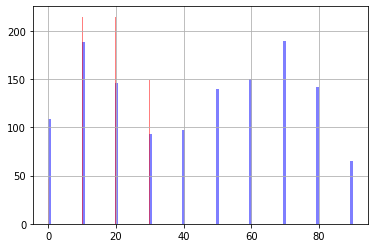

In [15]:
#comparing the distribution of FOLLOWED_RECOMMENDATIONS_PCT with successful and unsuccessful cross sells
chef_df['FOLLOWED_RECOMMENDATIONS_PCT'][chef_df['CROSS_SELL_SUCCESS'] == 1].hist(bins = 100,
                                                                   color = 'b',
                                                                   alpha = 0.5)
chef_df['FOLLOWED_RECOMMENDATIONS_PCT'][chef_df['CROSS_SELL_SUCCESS'] != 1].hist(bins = 100,
                                                                   color = 'r',
                                                                   alpha = 0.5)

plt.show()

<br>
<h3>Engineering High Followed Recommendations Percent based on the 30% threshold</h3><br>

***

In [16]:
# placeholder for 'High_FOLLOWED_RECOMMENDATIONS_PCT' feature
chef_df['High_FOLLOWED_RECOMMENDATIONS_PCT'] = 0


# replacing values based on the 30% threshold 
for index, col in chef_df.iterrows():
    #over 30% of reccomendations followed will receive a value of 1
    if chef_df.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] >= 30:
        chef_df.loc[index, 'High_FOLLOWED_RECOMMENDATIONS_PCT'] = 1
        
#dropping FOLLOWED_RECOMMENDATIONS_PCT because they have been encoded
chef_df = chef_df.drop('FOLLOWED_RECOMMENDATIONS_PCT', axis = 1)

<br>
<h3>Previous Generation Feature Engineering</h3><br>

Based on <a href="https://www.quora.com/Do-people-still-use-Hotmail-in-2019">external research</a>, it was concluded that the <a href="https://onezero.medium.com/meet-the-people-with-the-aol-email-addresses-c28f2163f8d">'junk email'</a> user base (@aol.com, @hotmail.com, @live.com, @msn.com, etc) represented a generation of workers who's business lives required the use of these platforms. As such, it was assumed that it was hard for them to move on from all the pre-existing data such as contacts and emails. 

For this reason the <strong>variables junk_email and LANDLINE will imputed as a new variable called PREVIOUS_GEN.</strong>

***

In [17]:
#creating PREVIOUS_GEN variable for storing results 
chef_df['PREVIOUS_GEN'] = 0

# looping to create an obervation of 1 if a user has either a junk email or a landline number
for index, col in chef_df.iterrows():
    if chef_df.loc[index, 'junk_email'] == 1: 
        chef_df.loc[index, 'PREVIOUS_GEN'] = 1
      
    elif chef_df.loc[index, 'LANDLINE'] == 1:
        chef_df.loc[index, 'PREVIOUS_GEN'] = 1
        
        
#dropping junk_email and LANDLINE because they have been encoded
chef_df = chef_df.drop(['junk_email', 'LANDLINE'], axis = 1)

<h3>Feature Correlation with Cross-Sell Success</h3>
    
Running feature correlations with cross-sell success to assess the strength of the new engineered features. All variables with no correlation will be eliminated. 

The previous generation feature has the strongest negative correlation with cross-sell success among the other features. 

As expected, having a high percentage of followed recommendations (above 30%) is the feature with the strongest positive correlation. 

<strong>It can be observed that customers who follow less than 30% of the recommendations, and cusotmers who use either a junk email or landline are not good targets for cross selling the wine.</strong>

***

In [18]:
#running correlations woth cross-sell success
chef_df_corr = chef_df.corr().round(2)

chef_df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

PREVIOUS_GEN                              -0.28
out_CONTACTS_W_CUSTOMER_SERVICE           -0.06
CANCELLATIONS_AFTER_NOON                  -0.05
MOBILE_LOGINS                             -0.05
0Classes                                  -0.05
change_high_MASTER_CLASSES_ATTENDED       -0.04
out_MASTER_CLASSES_ATTENDED               -0.04
3Classes                                  -0.04
AVG_CLICKS_PER_VISIT                      -0.04
change_high_LATE_DELIVERIES               -0.03
change_low_CONTACTS_W_CUSTOMER_SERVICE    -0.03
change_high_CONTACTS_W_CUSTOMER_SERVICE   -0.03
change_low_LARGEST_ORDER_SIZE             -0.03
out_PC_LOGINS                             -0.03
out_UNIQUE_MEALS_PURCH                    -0.03
out_REVENUE                               -0.02
out_TOTAL_MEALS_ORDERED                   -0.02
out_MOBILE_LOGINS                         -0.02
out_LARGEST_ORDER_SIZE                    -0.02
1Rating                                   -0.02
change_high_LARGEST_ORDER_SIZE          

<h3>Dropping Variables for Feature Selection:</h3>

- Features that have no correlation with cross-sell success
- Demographic varibales (non-integer) 
- Feature cross sell success since the percentage of followed recommendations will be used a the target variable
- Dummy features with a low value count such as attending to 2 or 3 master classes, or providing a rating of 1 or 5. 

***

In [19]:
#dropping variables that have no correlation (NaN) with CROSS_SELL_SUCCESS
#also dropping all variables that are not integer to run the logistic regression
chef_df = chef_df.drop(['out_PRODUCT_CATEGORIES_VIEWED', 'out_TASTES_AND_PREFERENCES', 
                        'out_FOLLOWED_RECOMMENDATIONS_PCT', 'out_PACKAGE_LOCKER', 
                        'out_REFRIGERATED_LOCKER', 'out_MOBILE_NUMBER', 'out_CROSS_SELL_SUCCESS', 
                        'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', '1Rating', '5Rating',
                        '3Classes', '2Classes', 'out_AVG_PREP_VID_TIME', 
                        'change_low_AVG_CLICKS_PER_VISIT', 'change_high_CANCELLATIONS_AFTER_NOON', 
                        'change_high_MASTER_CLASSES_ATTENDED', 'out_MASTER_CLASSES_ATTENDED', 
                        'out_REVENUE', 'change_low_CONTACTS_W_CUSTOMER_SERVICE'], axis=1)


In [20]:
# saving results in an excel file for consistency
chef_df.to_excel('chef_ALL_features.xlsx',
                 index = False)

<br>
<h1>Inpsecting Collinearity & Multicollinearity</h1><br>

Inspecting the collinearity and multicolinearity to determine which variables are highly correlated and contain similar information about the variance. 

- <strong>Collinearity:</strong> state where two features are highly correlated and contain similiar information about the variance within a given dataset. For the model's function to be a reliable estimator of the target feature, it's important that the predictor features are not correlated with each other and inlfate the results. 
    - A correlation matrix was used to detect if any two predictor features were highly correlated. 

- On the other hand, <strong>multicollinearity</strong> occurs when a feature can be explained by multiple other features in the dataset. In order to detect multicollinearity among various features, the <strong>variance inflation factor (VIF)</strong> was calculated for each variable to determine which to consider for the model training. 
    - The VIF provides an index that measures variance increases of estimated regression coefficients due to collinearity.

***

In [21]:
#reading saved excel with engineered features
chef_df = pd.read_excel("chef_ALL_features.xlsx")

#dropping cross-sell success to run the correlation matrix on the explanatory features only
chef_explanatory = chef_df.drop('CROSS_SELL_SUCCESS', axis = 1)

<h3>Correlation Matrix Heatmap</h3>

The heatmap below was used to detect collinearity among several of the engineered dummy features. For example:
- Attending to 0 of the instructional classes and attending to 1 instructional class have a high correlation with each other (absolute value of 0.85). 

- Similarly, providing a meal set median rating of 3 or a rating of 4 have a correlation absolute value with each other (0.44). Also indicating potential collinearity among predictor features. 

In order to further assess the impact of these correlations on the whole set of predictor features, the VIF of each feature was calculated. 

***

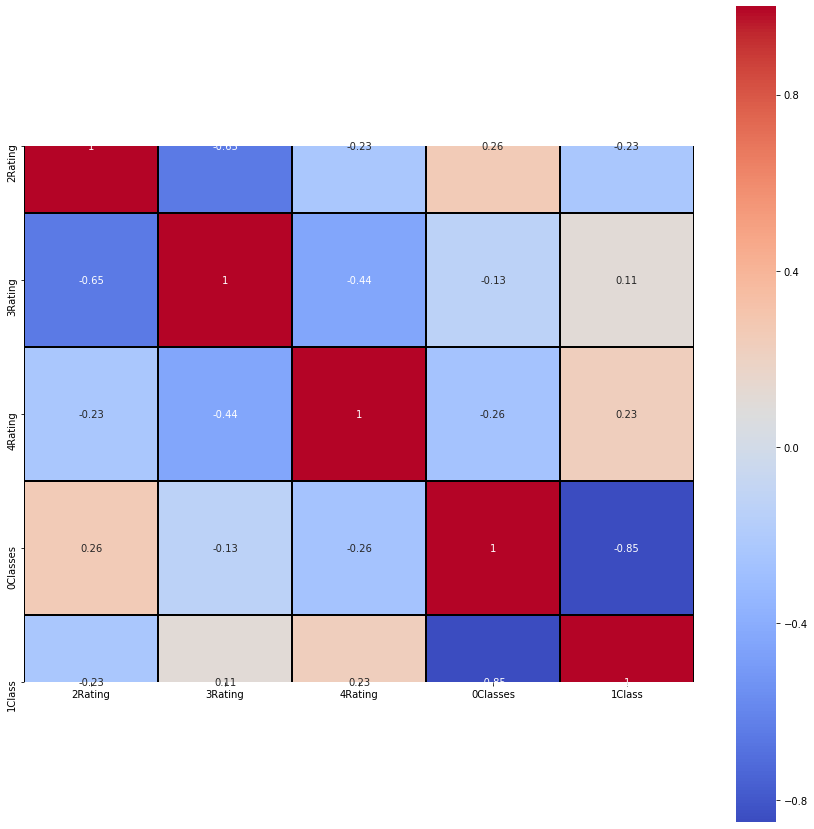

In [22]:
# Creating correlation heatmap 
# obtaiining the correlation between original variables, engineered features, and dummy vriables
fig, ax = plt.subplots(figsize=(15,15))

#creating correlation for chef_all_features ad saving it as chef_corr
chef_corr = chef_explanatory.corr().round(2)

#subsetting the correlation to compare REVENUE and all pre-exisitng varibales against the encoded variables 
chef_corr2 = chef_corr.iloc[44:49, 44:49]

sns.heatmap(chef_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


#displaying the correlation heatmap matrix
plt.show()

<br>
<h3>VIF Observations</h3><br>

Two meal rating dummy variables have a high VIF, showing that the variance of these features' coefficient is inflated due to multicollinearity.

A High Rating feature will be engineered to offset the multicollinearity from these two variables. 

- The R-squared value is that of the predictor regressed to all other features.

- The VIF represents the magnitude of multicollinearity with respect to other features.

***

In [23]:
feature_name = []
vif_value = []
rsq_value = []

for i in range(0, len(chef_explanatory.columns)):
    X = chef_explanatory.loc[:, chef_explanatory.columns != chef_explanatory.columns[i]]
    y = chef_explanatory.loc[:, chef_explanatory.columns == chef_explanatory.columns[i]]
    
    lr = LinearRegression().fit(X, y)
    
    rsq = lr.score(X, y)
    if rsq != 1:
        vif = round(1 / (1 - rsq), 2)
    else:
        vif = float("inf")
    
    feature_name.append(chef_explanatory.columns[i])
    rsq_value.append(rsq)
    vif_value.append(vif)
    
vif_df = pd.DataFrame({
        "r_squared": rsq_value,
        "vif": vif_value },
    index = feature_name
).sort_values(by="vif")


vif_df

r_squared    vif
PC_LOGINS                                 0.023116   1.02
out_MOBILE_LOGINS                         0.024572   1.03
out_PC_LOGINS                             0.033809   1.03
number_of_names                           0.031896   1.03
TASTES_AND_PREFERENCES                    0.026210   1.03
MOBILE_LOGINS                             0.032292   1.03
PRODUCT_CATEGORIES_VIEWED                 0.039470   1.04
High_FOLLOWED_RECOMMENDATIONS_PCT         0.061705   1.07
out_CANCELLATIONS_AFTER_NOON              0.093699   1.10
CANCELLATIONS_AFTER_NOON                  0.095866   1.11
change_high_AVG_TIME_PER_SITE_VISIT       0.111480   1.13
change_high_LATE_DELIVERIES               0.163076   1.19
UNIQUE_MEALS_PURCH                        0.157250   1.19
change_high_CANCELLATIONS_BEFORE_NOON     0.163306   1.20
change_low_AVG_PREP_VID_TIME              0.187288   1.23
CONTACTS_W_CUSTOMER_SERVICE               0.204932   1.26
change_high_TOTAL_PHOTOS_VIEWED           0.225229   1.29
CANCELLATIONS_BEFORE_NOON                 0.223857   1.29
PACKAGE_LOCKER                            0.246285   1.33
REFRIGERATED_LOCKER                       0.250116   1.33
change_high_AVG_PREP_VID_TIME             0.261620   1.35
out_UNIQUE_MEALS_PURCH                    0.262320   1.36
LATE_DELIVERIES                           0.274471   1.38
out_CONTACTS_W_CUSTOMER_SERVICE           0.281014   1.39
out_CANCELLATIONS_BEFORE_NOON             0.291384   1.41
change_high_CONTACTS_W_CUSTOMER_SERVICE   0.297267   1.42
out_LATE_DELIVERIES                       0.331194   1.50
change_high_LARGEST_ORDER_SIZE            0.414531   1.71
uknown_email                              0.426765   1.74
out_AVG_TIME_PER_SITE_VISIT               0.430042   1.75
out_TOTAL_MEALS_ORDERED                   0.441804   1.79
out_AVG_CLICKS_PER_VISIT                  0.476356   1.91
AVG_TIME_PER_SITE_VISIT                   0.488285   1.95
out_TOTAL_PHOTOS_VIEWED                   0.529487   2.13
TOTAL_MEALS_ORDERED                       0.577514   2.37
out_MEDIAN_MEAL_RATING                    0.592446   2.45
change_low_LARGEST_ORDER_SIZE             0.595432   2.47
TOTAL_PHOTOS_VIEWED                       0.641189   2.79
out_EARLY_DELIVERIES                      0.657973   2.92
EARLY_DELIVERIES                          0.658374   2.93
out_LARGEST_ORDER_SIZE                    0.662728   2.96
REVENUE                                   0.678402   3.11
LARGEST_ORDER_SIZE                        0.724775   3.63
1Class                                    0.749652   3.99
AVG_CLICKS_PER_VISIT                      0.766943   4.29
0Classes                                  0.783754   4.62
WEEKLY_PLAN                               0.787985   4.72
out_WEEKLY_PLAN                           0.787966   4.72
2Rating                                   0.798695   4.97
AVG_PREP_VID_TIME                         0.808021   5.21
MOBILE                                    0.819908   5.55
4Rating                                   0.889889   9.08
3Rating                                   0.892855   9.33
work_email                                0.923250  13.03
PREVIOUS_GEN                              0.924635  13.27
personal_email                            0.929090  14.10

<br>
<h2>Engineering High Rating Feature</h2>

Based on the VIF results, the high rating feature was engineered with customers who rated Apprentice Chef with a 3 or a 4.  

***

In [24]:
# placeholder for 'High_RATING' feature
chef_df['High_RATING'] = 0


# replacing values based on the 30% threshold 
for index, col in chef_df.iterrows():
    #Ratings of 3 and 4 will receive a value of 1
    if chef_df.loc[index, '3Rating'] == 1:
        chef_df.loc[index, 'High_RATING'] = 1
    elif chef_df.loc[index, '4Rating'] == 1:
        chef_df.loc[index, 'High_RATING'] = 1

#dropping 1Class and 0Classes featiures after they've been encoded into the FEW_CLASSES_ATTENDED feature
chef_df = chef_df.drop(['3Rating', '4Rating'], axis=1)

<br>
<h2>Dropping Personal Email Feature</h2>

The VIF results also showed that personal email had the highest multicollinearity with other features. Given that personal email only had a 0.04 correlation with cross-sell success (see previous feature correlation chart), the feature was dropped from the dataset. 

***

In [25]:
chef_df = chef_df.drop('personal_email', axis=1)

In [26]:
# saving results in an excel file for consistency
chef_df.to_excel('chef_ALL_features.xlsx',
                 index = False)

***

# Feature Selection for Predictive Model Comparison

***
***

<h2>Feature Selection Methods</h2>

In the following sections, two methods are used to select the final variables to be used for comparing the performance of several predictive models. 

<strong>Methods Used:</strong>

- <strong>P-value approach</strong> for variable elimination is used to select the initial set of significnat features via logistic regressions.

- <strong>Hyperparameter tuning</strong> for variable selection via GridSearch CV, decision tree classifiers, and feature importance plots. 


In [27]:
#reading saved excel with engineered features
chef_df = pd.read_excel("chef_ALL_features.xlsx")

<h3>Declaring Target and Predictor Features</h3>

***

In [28]:
# declaring predictor variables
chef_data   =  chef_df.drop(['CROSS_SELL_SUCCESS'], axis = 1)

# declaring response variable
chef_target = chef_df.loc[:, 'CROSS_SELL_SUCCESS']

<h3>Train-Test Split</h3>

Splitting the data into training and testing sets with stratification so each data point has an equal chance of being selected. 

***

In [29]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 508,
            stratify = chef_target) #used for simple random sampling to give every data point an equal chnace of being selected 


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

***

# Logistic Regression

Running logistic regressions to begin feature selection via the P-value approach. Several logistic regressions were run in order to select the best possible set of features. For purposes of this report, only the final logistic regression will be showed containing the set of features to be used for hyperparameter tuning. 

***
***

<h3>Feature Correlations with Cross-Sell Success</h3>

The following correlation matrix allows us to see which variables have a strong correlation with cross-sell success.
    - Both strong positive and negative correlations are important. 

These correlations will be used alongside the p-values of the logistic regressions (next section) to select the initial set of significant features. 

***

In [30]:
#creating correlation for chef_all_features ad saving it as chef_corr
chef_corr_css = chef_df.corr().round(2)

# creating a (Pearson) correlation matrix for better comparison of the variables correlation with cross-sell success
chef_corr_css.loc[:, 'CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                         1.00
High_FOLLOWED_RECOMMENDATIONS_PCT          0.40
work_email                                 0.19
CANCELLATIONS_BEFORE_NOON                  0.16
number_of_names                            0.16
MOBILE                                     0.10
TASTES_AND_PREFERENCES                     0.08
REFRIGERATED_LOCKER                        0.07
out_CANCELLATIONS_BEFORE_NOON              0.06
1Class                                     0.05
CONTACTS_W_CUSTOMER_SERVICE                0.04
PC_LOGINS                                  0.04
PACKAGE_LOCKER                             0.04
out_MEDIAN_MEAL_RATING                     0.03
AVG_PREP_VID_TIME                          0.03
out_CANCELLATIONS_AFTER_NOON               0.03
EARLY_DELIVERIES                           0.02
LARGEST_ORDER_SIZE                         0.02
out_EARLY_DELIVERIES                       0.02
out_LATE_DELIVERIES                        0.02
High_RATING                             

<br>
<h3>P-Value Approach for Feature Selection</h3><br>

In the following logistic regression, the least significant varibles were eliminated via the p-value variable selection approach. The p-values were interpreted alongside with the predictor features' correlation with cross-sell (shown above). This was done to provide an accurate selection of the features that are indeed significant to successfully cross-selling the 'Halfway There' wine.  

<strong>The final set of significant features will be derived from a mixture of the p-value approach, correlation matrix, and hyperparameter tuning (next section).</strong>

***

In [31]:
# instantiating a logistic regression model object
logistic_regression_css = smf.logit(formula   = """chef_train['CROSS_SELL_SUCCESS'] ~ 
chef_train['CANCELLATIONS_BEFORE_NOON'] +
chef_train['CANCELLATIONS_AFTER_NOON'] +
chef_train['TASTES_AND_PREFERENCES'] +
chef_train['REFRIGERATED_LOCKER'] +
chef_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['work_email'] +
chef_train['number_of_names'] +
chef_train['High_FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_train['PREVIOUS_GEN']
""",
                           data = chef_train)


# FITTING the model object
logistic_regression_css_fit = logistic_regression_css.fit()


# checking the results SUMMARY
logistic_regression_css_fit.pvalues.sort_values(ascending=False)

Optimization terminated successfully.
         Current function value: 0.469310
         Iterations 6


chef_train['out_CONTACTS_W_CUSTOMER_SERVICE']      4.097197e-02
chef_train['REFRIGERATED_LOCKER']                  3.129832e-02
chef_train['CANCELLATIONS_AFTER_NOON']             1.554437e-03
chef_train['TASTES_AND_PREFERENCES']               8.849864e-04
chef_train['work_email']                           1.223544e-06
chef_train['CANCELLATIONS_BEFORE_NOON']            3.109883e-08
chef_train['number_of_names']                      7.795219e-10
Intercept                                          1.828790e-11
chef_train['PREVIOUS_GEN']                         8.962985e-17
chef_train['High_FOLLOWED_RECOMMENDATIONS_PCT']    1.575421e-38
dtype: float64

***

# GridSearchCV & Hyperparameter Tuning

In the following section, GridSearchCV will be used for hyperparaeter tuning and variable selection via Decision Tree Classifiers and Feature Importance Graphs. 

***
***

<h3>Candidate Model Dictionary</h3>

The final significant features from the logistic regression and correlation matrix will now be placed through GridSearchCV for Hyperparameter Tuning. From this, the final features for model comparison will be obtained. 

The following dictionary candidate_dict will be used to store the significant features from the logistic regression and correlation matrix. 

***

In [32]:
# creating a dictionary to store the significant predictor variables for the candidate models
candidate_dict = {
    'grid_sig'     : ['TASTES_AND_PREFERENCES', 'PREVIOUS_GEN', 
                      'work_email', 'CANCELLATIONS_BEFORE_NOON', 'number_of_names', 
                      'High_FOLLOWED_RECOMMENDATIONS_PCT', 'CONTACTS_W_CUSTOMER_SERVICE', 
                      'EARLY_DELIVERIES', 'TOTAL_MEALS_ORDERED', '0Classes', 
                      'MOBILE', 'PACKAGE_LOCKER'],   
}

<br>
<h3>Train Test Split</h3><br>

Specifying predictor features from the candidate dictionary and target feature (Cross-Sell Success). Also calling train test split on the significant predictor features. 

Stratification is also used on the target data to give every data point an equal chnace of being selected. 

***

In [33]:
# specifying predictor and target features
chef_data   =  chef_df.loc[ : , candidate_dict['grid_sig']]

chef_target =  chef_df.loc[ : , 'CROSS_SELL_SUCCESS']

# calling train_test_split on chef_data and chef_target
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 802,
            stratify     = chef_target)

<br>
<h3>GridSearchCV</h3><br>

Grid Search is an exhaustive search for selecting a model by comparing all possible combination of hyperparameters values against each of the selected parameters (features). This method was selected over Random Search due to its exhaustive search of all possible hyperparameter combinations. 

***

In [34]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# Instantiating the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# Fitting to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6, 'splitter': 'best'}
Tuned Training AUC: 0.6123


<br>
<h3>Hyperparameter Tuning</h3><br>

Hyperparameters are parameters (features) whose values are adjusted before training the model. Similar to adjusting the heat-level of the stove or selecting the amount of ingredients to use when cooking. By tuning the parameters selected from the Grid Search, the model will become more precise at predicting for the target feature. 

<u>By tuning the hyperparameters with Grid Search:</u>
- This model was able to achieve a test accuracy score 86.24%. Meaning that <strong>the model can accurately generalize to about 86% of unseen data.</strong>

- The AUC score of 84.96% shows that <strong>the model can distinguish between the two classes (cross-sell success and cross-sell unsuccess) 85% of the time.</strong>

- Given that the score difference between the training and testing accuracy is less than 0.05, it can be concluded that <strong>this model does not overfit the rules from the training set on the testing set.</strong> 
 
***

In [35]:
# building a model based on hyperparameter tuning results
# Instantiating a decision tree classifier model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_

# Predicting based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)

# Scoring the results
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4)
tree_tuned_test_score = tree_tuned.score(X_test, y_test).round(4)
tree_tuned_difference = (tree_tuned_test_score - tree_tuned_train_score).round(2)
tree_tuned_auc = roc_auc_score(y_true  = y_test, y_score = tree_tuned_pred).round(4)

# Saving the model's performance scores for future comparison
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'Score Difference', 
                      'AUC Value']]

# saving the model's results for future comparison
model_performance.append(['Tuned Tree',
                          tree_tuned_train_score,
                          tree_tuned_test_score,
                          tree_tuned_difference,
                          tree_tuned_auc])



#printing the model's scores 
print('Training ACCURACY:', tree_tuned_train_score)
print('Testing  ACCURACY:', tree_tuned_test_score)
# printing the score difference to check if the training and testing scores are within 0.05 of each other
print(f"Score difference : {round((tree_tuned_test_score - tree_tuned_train_score), 2)}")
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.8396
Testing  ACCURACY: 0.8624
Score difference : 0.02
AUC Score        : 0.8496


<br>
<h3>Decision Tree Classifier</h3><br>

Visualizing the final tuned hyperparameters from GridSearchCV with a decision tree. 
 
***

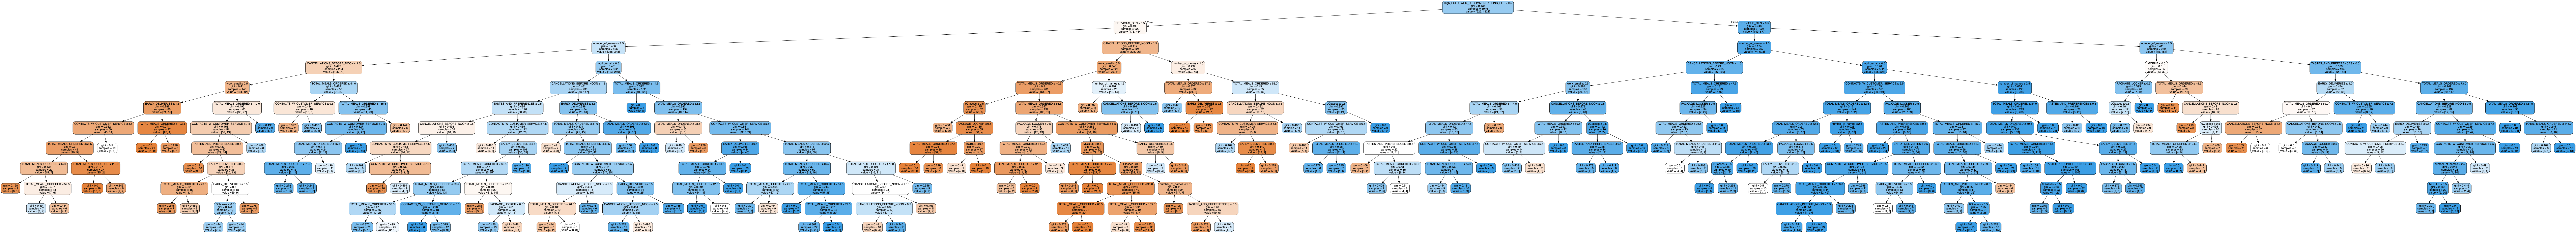

In [36]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = chef_data,
             height = 2000,
             width  = 2000)

<br>
<h3>Feature Importance Plot</h3><br>

Plotting the final features with their importance level represented by the bars.  
 
***

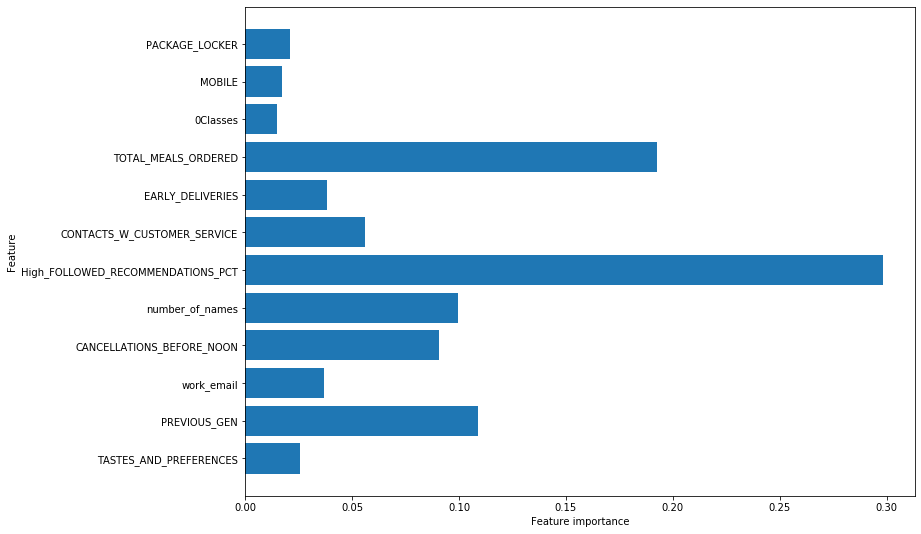

In [37]:
# plotting feature importance
plot_feature_importances(tree_tuned,
                         train = X_train,
                         export = False)

<br>
<h2>Final Features</h2><br>

From the feature importance plot, it can be observed that the following features were determined as the most important for predicting the success of cross-selling the promotional wine: 
- Having a package locker for delivery of meals / wine

- Registering with a mobile number 
    - The customer onboarding process requires a phone number to be provided upon registration. Given that the registration process was done on the website or mobile app, registering with a mobile number over a landline number helps segment the market for future promotion 

- Not attentiding to any of the instructional classes
    - Can show insight into user segmentation by targeting the savvy customers who do not require instructional classes for getting the value from the meals ordered  

- The total amount of meals ordered

- The amount of deliveries completed early 

- The amount of times customer service was contacted 

- Following at least 30% of the recommendations 
    - <strong>(most important feature for predicting for cross-sell success)</strong>

- The number of names used when registering 
    - Can show a measure of intent by providing more accurate information from registration

- The amount of orders cancelled before noon 
    - It is worth mentioning that only the orders cancelled before noon were subject to a full refund. Orders cancelled after noon were subject to partial refund

- Having a work email domain 
    - This goes in hand with the companies strategy since they are attempting to target the busy professionals 

- Having completed the registration with a landline number and/or 'junk email' is a strong indicator of which customers will not be successful for cross-selling the wine 
    - Hence, users who fall under the Previous Generation feature are important for successfully predicting the customers who will engage in the promotional campaign

- Having specified their tastes and preferences upon registration 
    - The customer onboarding process also included offered optional fields to specify the tatses and preferences to offer more personalized meals. This can also be a measure of intent as isers who are more engaged from the time of registration are more likely to subscribbe to the Halfway There campaign



***

***

# Model Comparison

In the following section, the final set of features will be tested accross various models on their ability to predict for cross-sell success.

***
***

<h2>Models to be Compared:</h2>

- Tuned Decision Tree 
- k-Nearest-Neighbors (k-NN)
- Logistic Regression
- Ridge Regression Model 
- Automatic Relevance Determination Regression (ARD) Model
- Pruned Decision Tree (CART Model)

***

<h3>k-Nearest-Neighbors (k-NN) Classifier</h3>

The oprtimal number of neighbors determined is 7. This optimal number of neighbors will be used when instantiating the k-NN classifier and fitting it to the training data.

The k-NN model attempts to predict the output of a classification problem (cross-sell success vs cross-sell unsuccess), under the assumption that similar things exist in close proximity of each other. Click <a href="https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761">here</a> to read more about the k-NN model. 

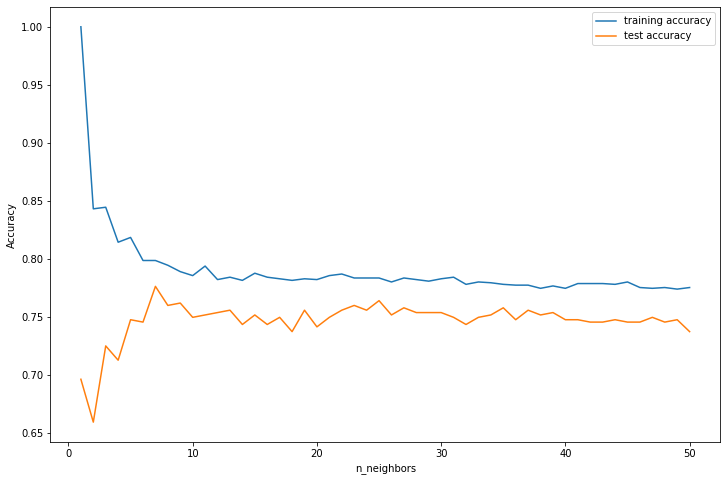

The optimal number of neighbors is: 7


In [38]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = chef_df.loc[ : , candidate_dict['grid_sig']],
                                 y_data = chef_target,
                                 max_neighbors = 50, 
                                 response_type = 'class')

In [39]:
# instantiating StandardScaler()
scaler = StandardScaler()


# fitting the data
scaler.fit(chef_df.loc[ : , candidate_dict['grid_sig']])


# transforming the data
X_scaled     = scaler.transform(chef_df.loc[ : , candidate_dict['grid_sig']])


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled)


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 802,
            test_size = 0.25,
            stratify = chef_target)


# instantiating a KNN classification model with optimal neighbors of 7 
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# fitting the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)

# Scoring the results
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score = knn_fit.score(X_test_scaled, y_test_scaled).round(4)
knn_difference = (knn_test_score - knn_train_score).round(2)
knn_auc = roc_auc_score(y_true  = y_test_scaled, y_score = knn_pred).round(4)


# Saving the performance results for future comparison
model_performance.append(['KNN Classifier',
                          knn_train_score,
                          knn_test_score,
                          knn_difference,
                          knn_auc])

<br>
<h3>Logistic Regression Model</h3><br>

Logistic regression models are classification models that distinguish between two different categories by fitting an S shaped curve on the observations, rather than a straight line like linear regressions. Click <a href="https://towardsdatascience.com/logistic-regression-explained-9ee73cede081">here</a> to read more about the logistic regression model. 



***

In [40]:
#############################
# Logistic Regression Model #
#############################

# instantiating a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs', #this will make assumptions to our data not possible on linear regressions 
                            C = 1, #guides our coefficients to avoid overfitting
                            random_state = 802) 

# fitting the training data
logreg_fit = logreg.fit(X_train, y_train)


# predicting based on the testing set
logreg_pred = logreg_fit.predict(X_test)

# Scoring the results
logreg_train_score = logreg_fit.score(X_train, y_train).round(4)
logreg_test_score =  logreg_fit.score(X_test, y_test).round(4)
logreg_difference = (logreg_test_score - logreg_train_score).round(2)
logreg_auc = roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(4)


# saving the performance results for future model comparison
model_performance.append(['Logistic Regression',
                          logreg_train_score,
                          logreg_test_score,
                          logreg_difference,
                          logreg_auc])

/Users/josebuelto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<br>
<h3>Ridge Regression Model</h3><br>

Ridge regression model attempts to solve multicollinearity by adding sufficient bias to make the estimations reliable approximations of the true population values. Click <a href="https://www.statisticshowto.com/ridge-regression/">here</a> to read more about the Ridge regression model. 

***

In [41]:
################
# Ridge Model #
###############

# Instantiating the ridge model object
#it penalizes coefficients to reduce difference between train and testing scores 
ridge_model = sklearn.linear_model.Ridge()

# Fitting the ridge model to the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# Predicting on new data
ridge_pred = ridge_fit.predict(X_test)

# Saving scoring results
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)
ridge_difference = (ridge_test_score - ridge_train_score).round(2)
ridge_auc = roc_auc_score(y_true  = y_test, y_score = ridge_pred).round(4)


# saving the performance results for future comparison
model_performance.append(['Ridge Model',
                          ridge_train_score,
                          ridge_test_score,
                          ridge_difference,
                          ridge_auc])

<br>
<h3>Automatic Relevance Determination Regression (ARD) Model</h3><br>

This is a fit regression model with Bayesian Ridge Regression, where the coefficient weights are slightly shifted toward zeroes to stabilize them. Click <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html">here</a> to read more about the ARD regression model. 

***

In [42]:
#############
# ARD Model #
#############

# Instantiating the ard model object
ard_model = sklearn.linear_model.ARDRegression()


# Fitting the training data
ard_fit = ard_model.fit(X_train, y_train)


# Predicting on new data
ard_pred = ard_fit.predict(X_test)


# Saving scoring results
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_train, y_train).round(4)
ard_difference = (ard_train_score - ard_test_score).round(2)
ard_auc = roc_auc_score(y_true  = y_test, y_score = ard_pred).round(4)

# saving the results for future model comparison
model_performance.append(['ARD Model',
                          ard_train_score,
                          ard_test_score,
                          ard_difference,
                          ard_auc])

<br>
<h3>Classification And Regression Tree (CART) Model</h3>

Developing a pruned classification tree to compare prediction results with previous models.

CART models attempt to predict the value of a target variable based on several predictor variables via a decision tree where each node contains an outcome prediction and each fork is a predictor variable split. As a result, providing a tree with the most significant features and their values for predicting for cross-sell success. Click <a href="https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/">here</a> to read more about the CART model. 

  

***

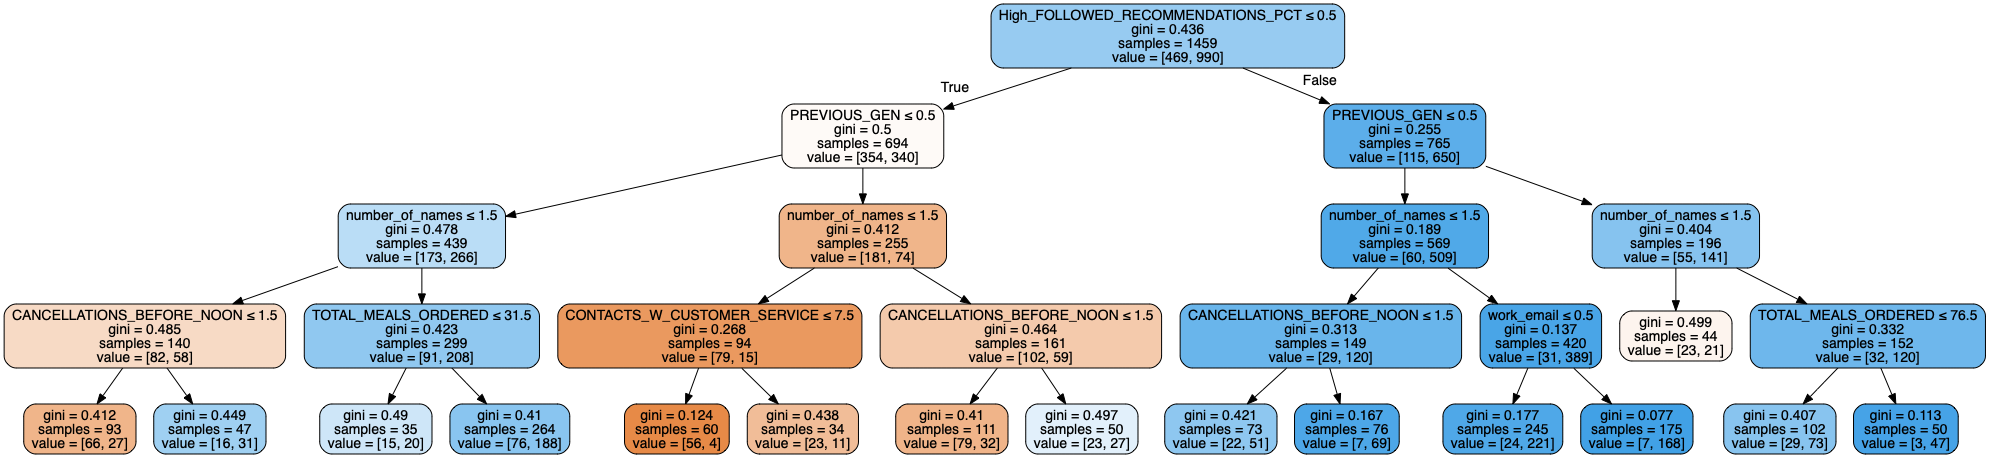

In [43]:
# Instantiating a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# Fitting the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# Predicting on new data
tree_pruned_pred = tree_pruned_fit.predict(X_test)

# Saving score results 
pruned_tree_train_score = tree_pruned_fit.score(X_train, y_train).round(4)
pruned_tree_test_score  = tree_pruned_fit.score(X_test, y_test).round(4)
pruned_tree_difference = (pruned_tree_test_score - pruned_tree_train_score).round(2)
pruned_tree_auc       = roc_auc_score(y_true  = y_test, y_score = tree_pruned_pred).round(4)

# saving the results for future model comparison
model_performance.append(['Pruned Tree',
                          pruned_tree_train_score,
                          pruned_tree_test_score,
                          pruned_tree_difference,
                          pruned_tree_auc])


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

<br>
<h2>Model Comparison DataFrame</h2>

Based on the results of all six models, it is evident that the <strong>tuned decision tree is the best performing model for predicting for cross-sell success of the Halfway There promotional campaign.</strong> It is the most accurate at generalizing the model in the test set. 

***

In [44]:
# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  Score Difference  AUC Value
0           Tuned Tree             0.8396            0.8624              0.02     0.8496
1       KNN Classifier             0.7971            0.7700             -0.03     0.7088
2  Logistic Regression             0.7786            0.8008              0.02     0.7416
3          Ridge Model             0.2577            0.2988              0.04     0.8401
4            ARD Model             0.2556            0.2556              0.00     0.8407
5          Pruned Tree             0.7827            0.7864              0.00     0.7311

<br>
<h3>Best Performing Model - Tuned Decision Tree Classifier</h3><br>
The decision tree with the hyperparameters from Grid Searcg is the best performing model because it has the <strong>highest testing accuracy (0.8396)</strong>, and the <strong>difference between this score and the training accuracy is less than 0.05.</strong> Meaning that it can generalize well to unseen data. 

Also, the <strong>AUC socre for this model is 0.8496.</strong> Meaning that this model has an 85% chance of correcly differentiating the two classes (cross-sell success and cross-sell unsuccess). 

Based on these results, a confusion matrix analysis was also done on the Tuned Tree model to assess its recall and precision. 

***

<h2>Confusion Matrix</h2>

***

<strong>The following confusion matrix can be read as follows:</strong><br><br>

~~~
                   |
  True Positives   |  False Negatives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Positives  |  True Negatives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
<strong>Applying the confusion matrix to our model:</strong><br><br>

~~~
                                         |
  PREDICTED: Cross-Sell Success (= 1)    |  PREDICTED: Cross-Sell Unsuccess (= 0)
  ACTUAL:    Cross-Sell Success (= 1)    |  ACTUAL:    Cross-Sell Success   (= 1)
                                         |
  ---------------------------------------|------------------------------------------------
                                         |
  PREDICTED: Cross-Sell Success   (= 1)  |  PREDICTED: Cross-Sell Unsuccess (= 0)
  ACTUAL:    Cross-Sell Unsuccess (= 0)  |  ACTUAL:    Cross-Sell Unsuccess (= 0)
                                         |  
~~~

***

<h3>Confusion Matrix Results</h3>

Based on the results of the confusion matrix, it can be observed that this model <strong>accurately predicted for cross-sell success on 127 instances.</strong> Similarly, it <strong>accurately predicted for cross-sell unsuccess on 293 instances.</strong> While only being unsuccessful in its predictions for 67 instances. 

***

[[127  29]
 [ 38 293]]


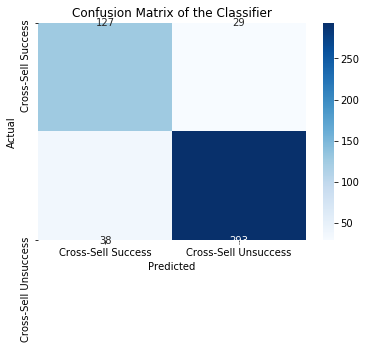

In [45]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = tree_tuned_pred))

# calling the visual_cm function to visualize the correlation matrix 
visual_cm(true_y = y_test,
          pred_y = tree_tuned_pred,
          labels = ['Cross-Sell Success', 'Cross-Sell Unsuccess'])

<br>
<h2>Classification Report</h2><br>
Based on the results of the classification report, we can conclude that the model is a good predictor for customers who will subscribe to the Halfway There promotional campaign. 

- The recall score of this model shows that its algorithm can <strong>correclty classify the 89% of the cross-sell success results.</strong> Essentially, only missing 11% of the potential successful cross-sells of the wines. 

- The precision score shows that only 9% of the results were incorrectly predicted as cross-sell success. <strong>Meaning that 91% of the results of this model are relevant to the business objective (correctly predicting for cross-sell success).</strong>  

- Finally, <strong>the f1 socre shows that the model is 90% accurate at correctly classifying cross-sell success and unsuccess.</strong> This is largely due because the f1 score takes into account false positives and false negatives (the incorrect predictions of cross-sell success and unsuccess).  

Given the business objective being solved by the model (predicting for successful cross-sells of the wine promotional campaign), having a high recall is of greater importance than having a high precision. 
    - It is more important to promote the Halfway There campaign to all customers who are interested in subscribing (recall), than to promote the campaign to customers who are not interested in subscribing (precision).   

These are positive results for Apprentice Chef, given that the predictive machine learning model does a good job in encapsulating most instances in which customers will subscribe to the promotional campaign.

For more information about recall, precision, and the f1-score click <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">here</a>.

***

In [46]:
#printing the classification report of the confusion matrix to assess its performance 
print(classification_report(y_test, tree_tuned_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       156
           1       0.91      0.89      0.90       331

    accuracy                           0.86       487
   macro avg       0.84      0.85      0.84       487
weighted avg       0.87      0.86      0.86       487

